In [7]:
# inspect data json und data/data.json

import json
import pandas as pd

with open('data/data.json', 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data)
print(df.info())

df.to_csv('data/data.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   timestamp                   8759 non-null   object 
 1   net_load                    8759 non-null   float64
 2   gross_load                  8759 non-null   float64
 3   pv_profile                  8759 non-null   float64
 4   e_opt                       8759 non-null   float64
 5   s_e_opt                     8759 non-null   float64
 6   SOC_opt                     8759 non-null   float64
 7   f_opt                       8759 non-null   float64
 8   s_l_opt                     8759 non-null   float64
 9   s_l_pv_opt                  8759 non-null   float64
 10  s_l_grid_opt                8759 non-null   float64
 11  electricity_savings_step    8759 non-null   float64
 12  feed_in_revenue_delta_step  8759 non-null   float64
 13  heavy_load                  8759 

In [4]:
df.describe()

,net_load,gross_load,pv_profile,e_opt,s_e_opt,SOC_opt,f_opt,s_l_opt,s_l_pv_opt,s_l_grid_opt,electricity_savings_step,feed_in_revenue_delta_step,heavy_load,foreign_power_costs
count,8759.000000,8759.000000,8759.000000,8759.000000,8.759000e+03,8759.000000,8759.000000,8.759000e+03,8.759000e+03,8.759000e+03,8759.000000,8.759000e+03,8759.000000,8.759000e+03
mean,259.911218,382.943487,170.648762,149.059870,2.411839e+01,0.248668,236.334997,2.656977e+01,2.602760e+01,5.421728e-01,4.715244,1.561656e+00,0.126384,2.000000e-01
std,161.686701,153.395722,277.692370,237.137064,6.938375e+01,0.307462,170.542486,7.605032e+01,7.559566e+01,9.857696e+00,14.053377,4.535739e+00,0.332301,2.981119e-14
min,0.000000,179.000000,0.000000,0.000000,-2.273737e-13,0.010000,0.000000,-2.273737e-13,-2.273737e-13,-1.776357e-15,-60.144170,-1.421085e-14,0.000000,2.000000e-01
25%,183.777881,255.500000,0.000000,0.000000,0.000000e+00,0.010000,47.222382,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,2.000000e-01
50%,266.000000,315.500000,0.000000,0.000000,0.000000e+00,0.075082,256.589191,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,2.000000e-01
75%,351.000000,521.500000,223.587501,216.360088,0.000000e+00,0.434104,339.036750,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,2.000000e-01
max,769.323010,876.000000,1099.352907,1041.120057,3.007209e+02,0.990000,769.323010,3.007209e+02,3.007209e+02,3.007209e+02,60.144170,1.804325e+01,1.000000,2.000000e-01


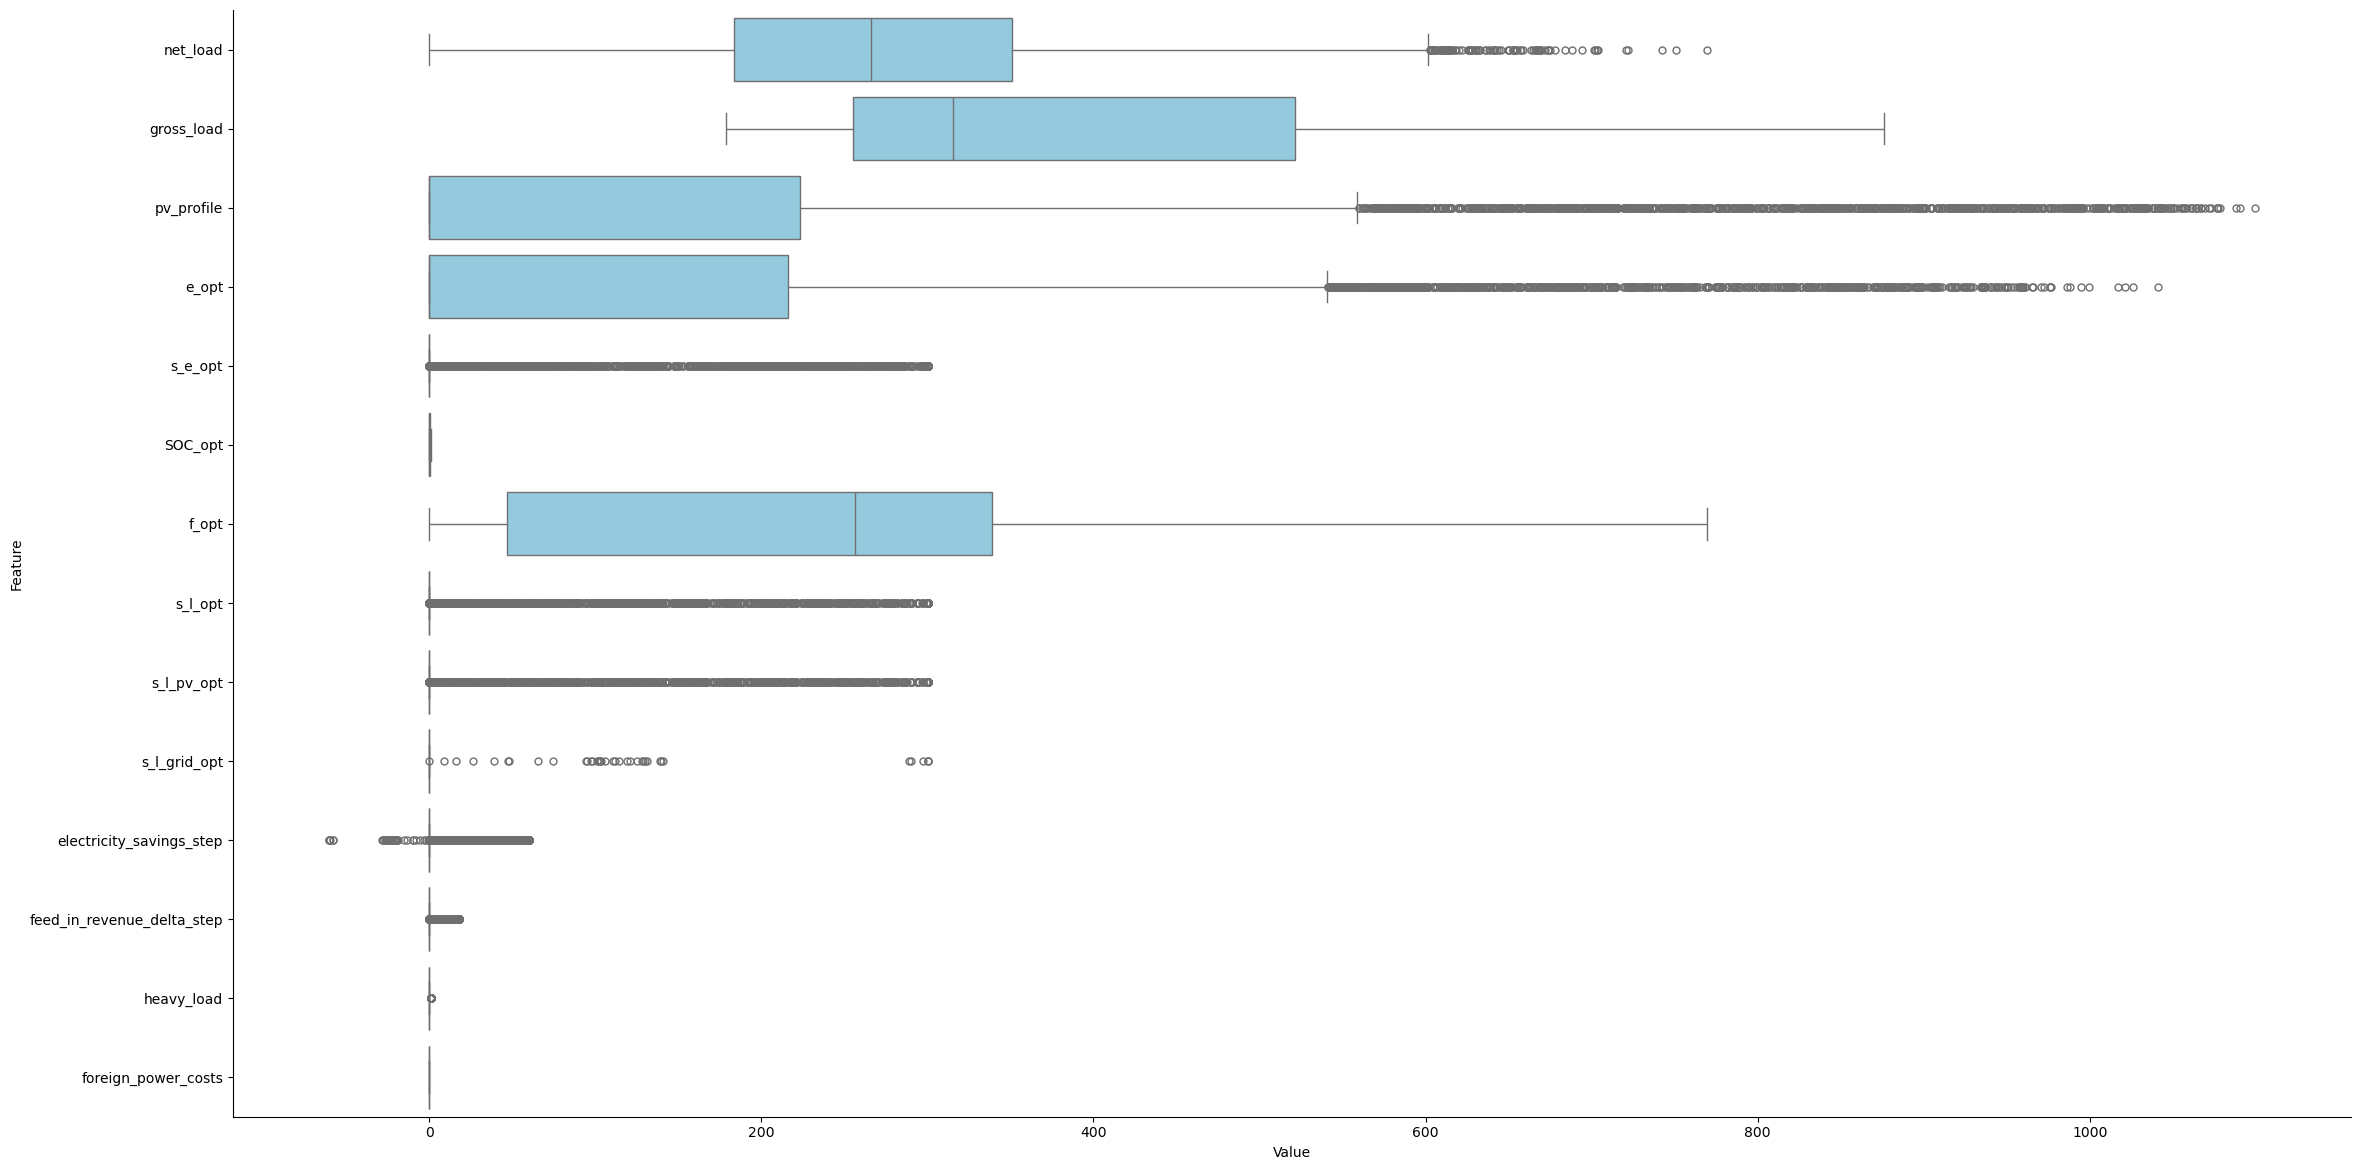

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include='number').columns

# Melt the dataframe for use with catplot
melted = df[numeric_cols].melt(var_name="variable", value_name="value")

# Use seaborn.catplot to create boxplots for each variable
g = sns.catplot(
    data=melted,
    x="value",
    y="variable",
    kind="box",
    height=0.7 * len(numeric_cols) + 2,
    aspect=2,
    color="skyblue"
)
g.set_titles("Boxplots of Numeric Features")
g.set_xlabels("Value")
g.set_ylabels("Feature")
plt.tight_layout()
plt.show()



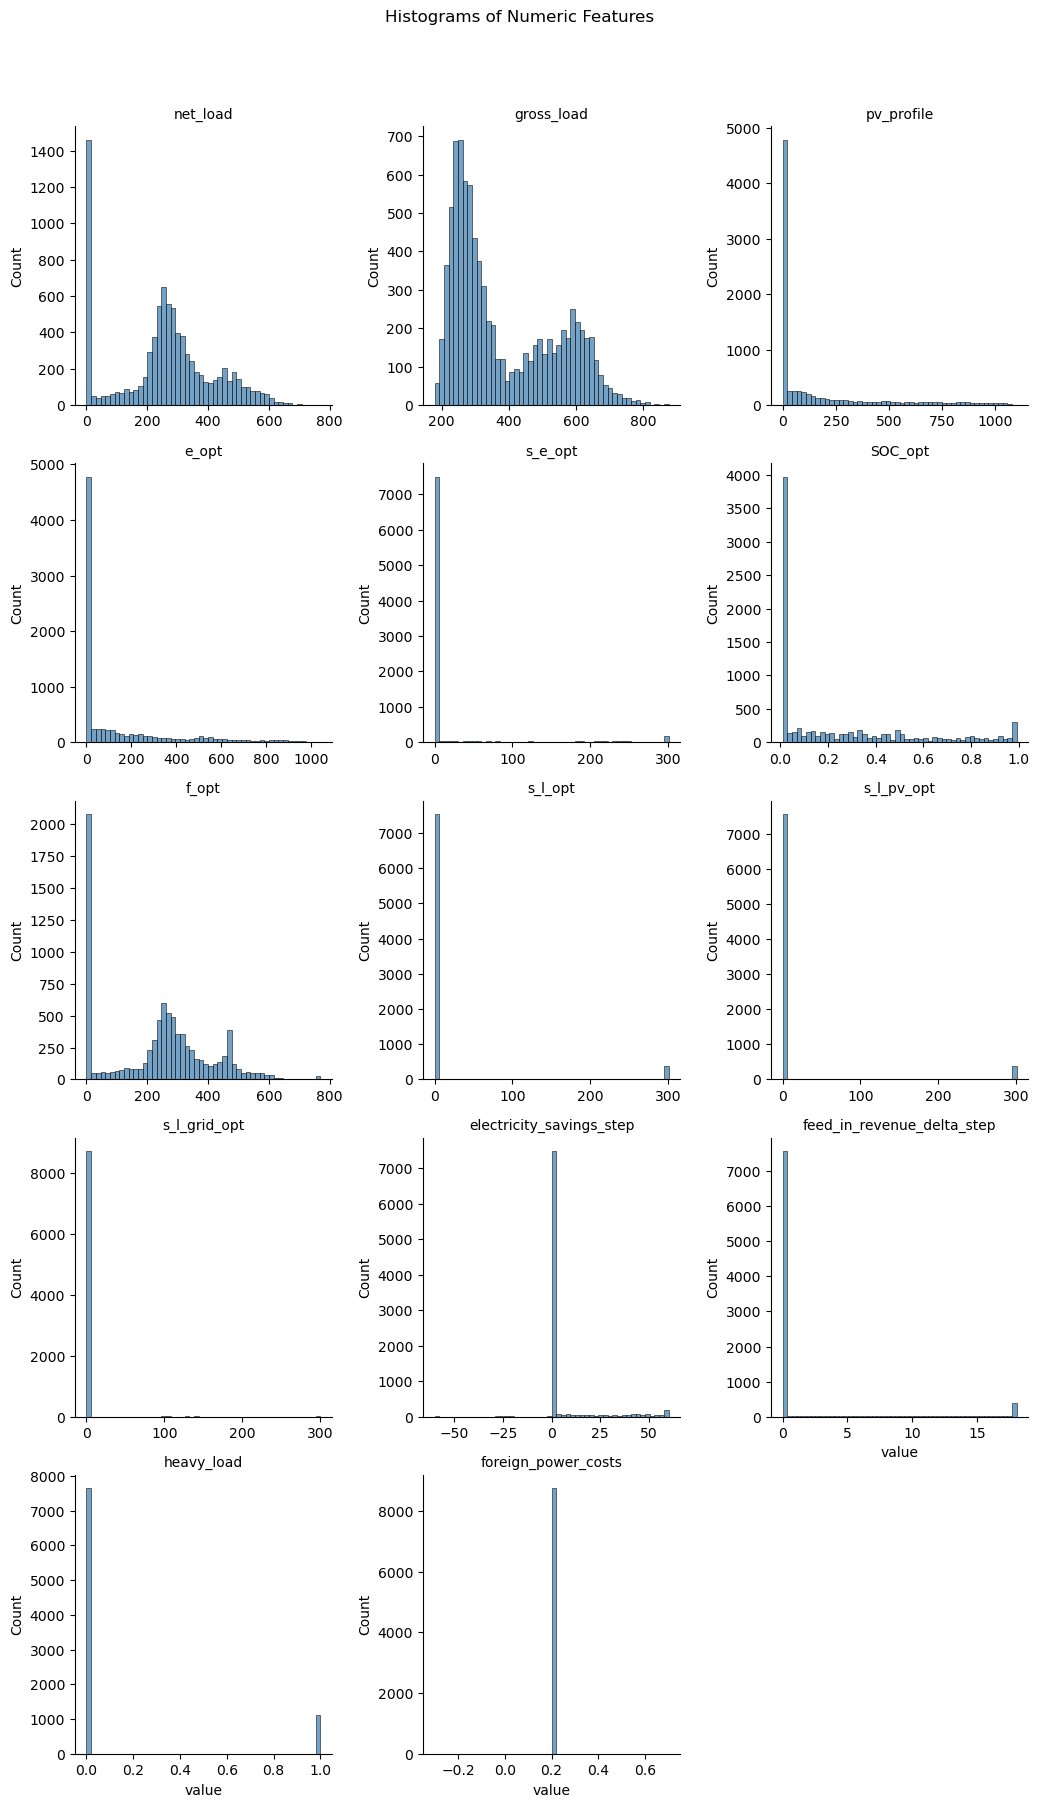

In [5]:
# Multi-faceted histograms for all numeric columns

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (use JSON if that's the main source, else CSV)
try:
    df = pd.read_json('data/data.json')
except Exception:
    df = pd.read_csv('data/data.csv')

numeric_cols = df.select_dtypes(include='number').columns

# Faceted histograms using seaborn's FacetGrid
melted = df[numeric_cols].melt(var_name="variable", value_name="value")
g = sns.FacetGrid(melted, col="variable", col_wrap=3, sharex=False, sharey=False, height=3.5)
g.map(sns.histplot, "value", bins=50, color="steelblue")
g.set_titles("{col_name}")
g.fig.suptitle("Histograms of Numeric Features", y=1.03)
plt.tight_layout()
plt.show()